# FLOSS Education Impact

In [40]:
import matplotlib.pyplot as plt
from github import Github
from getpass import getpass
import numpy as np

In [6]:
token = getpass()
g = Github(token)

········


In [7]:
mdseps = g.get_organization("fga-eps-mds")
repos = mdseps.get_repos()

In [16]:
issuetime_per_repo = {}
for repo in repos:
    issues = repo.get_issues(state='closed')
    total_time = 0
    total_count = 0
    for issue in issues:
        total_count += 1
        delta = (issue.closed_at - issue.created_at)
        total_time += delta.seconds/3600
    
    if total_count != 0:
        issuetime_per_repo[repo.name] = total_time/total_count

In [25]:
del issuetime_per_repo['A-Disciplina']

issuetime_per_repo['2016.1-Owla'] = issuetime_per_repo['Owla']
del issuetime_per_repo['Owla']

issuetime_per_repo['2017.2-fisCAE'] = issuetime_per_repo['fisCAE-2017-2']
del issuetime_per_repo['fisCAE-2017-2']

issuetime_per_repo

{'2016.1-Partiu_backend': 7.153511904761905,
 '2016.1-Partiu_frontend': 5.374258040935671,
 '2016.1-avalia_mais': 0.011527777777777777,
 '2016.1-AbasteceAqui': 4.211657986111111,
 '2016.1-Emergo': 5.241722222222222,
 '2016.1-TemRemedioAi': 0.013333333333333334,
 '2016.1-Purrsuit_front': 0.0025,
 '2016.1-Purrsuit_back': 0.004768518518518518,
 '2016.2-WikiLegis': 8.549548611111112,
 '2016.2-MissaoNascente': 8.08020947176685,
 '2016.2-Observatorio-de-Residuos-Frontend': 5.5486265432098785,
 '2016.2-SAS_FGA': 9.35678012519562,
 '2016.2-Jardim-Botanico-Web': 9.92263888888889,
 '2016.2-SME_UnB': 7.722578616352198,
 '2016.2-CidadeDemocratica': 7.119016516516516,
 '2016.2-SAAP': 1.2549666666666668,
 '2016.2-Observatorio-de-Residuos-Backend': 3.157026143790849,
 '2017.1-PlataformaJogosUnB': 9.071996632996633,
 '2017.1-Trezentos': 10.434939939939936,
 '2017.1-Forum-Coordenadores-DEG': 11.170503812636161,
 '2017.1-Escola-X': 6.749613010446344,
 '2017.1-SIGS': 5.816900966183579,
 '2017.1-Cadernos-

In [56]:
semesters = {}
for repo_name in issuetime_per_repo:
    if repo_name[:6] in semesters:
        semesters[repo_name[:6]].append(issuetime_per_repo[repo_name])
    else:
        semesters[repo_name[:6]] = [issuetime_per_repo[repo_name]]
        
avg_closing_time_per_semester = []

for semester in semesters:
    total_delta = 0
    for delta in semesters[semester]:
        total_delta += delta
        
    avg_delta = total_delta/len(semesters[semester])
    avg_closing_time_per_semester.append(
        {
            'id': semester,
            'value': avg_delta
        }
    )
    
avg_closing_time_per_semester = sorted(
    avg_closing_time_per_semester,
    key=lambda x: x['id'])

delta_time_series = [sem['value'] for sem in avg_closing_time_per_semester]
semester_time_series = [sem['id'] for sem in avg_closing_time_per_semester]

Text(0, 0.5, 'Time to close issue (hours)')

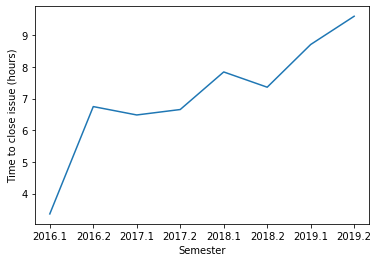

In [60]:
plt.plot(
    semester_time_series,
    delta_time_series
)
plt.xlabel('Semester')
plt.ylabel('Average time to close issue (hours)')
plt.title('Average time to close issue ')